In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="W3QShbWn0jM4MZPu3F45")
project = rf.workspace("doheewan-rrxlw").project("pothole-doqr3")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pothole-1 in yolov5pytorch:: 100%|██████████| 80/80 [00:00<00:00, 954.38it/s]


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!python /Users/Noh/Python_Code/Deep/ch13/yolov5/train.py --img 640 --batch 16 --epochs 10 --data "C:/Users/Noh/Python_Code/Deep/ch13/pothole-1/data.yaml" --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=C:/Users/Noh/Python_Code/Deep/ch13/pothole-1/data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-321-g3742ab49 Python-3.11.9 torch-2.3.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, 

Using cache found in C:\Users\Noh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-10 Python-3.11.9 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 720x720 (no detections)
Speed: 20.0ms pre-process, 241.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


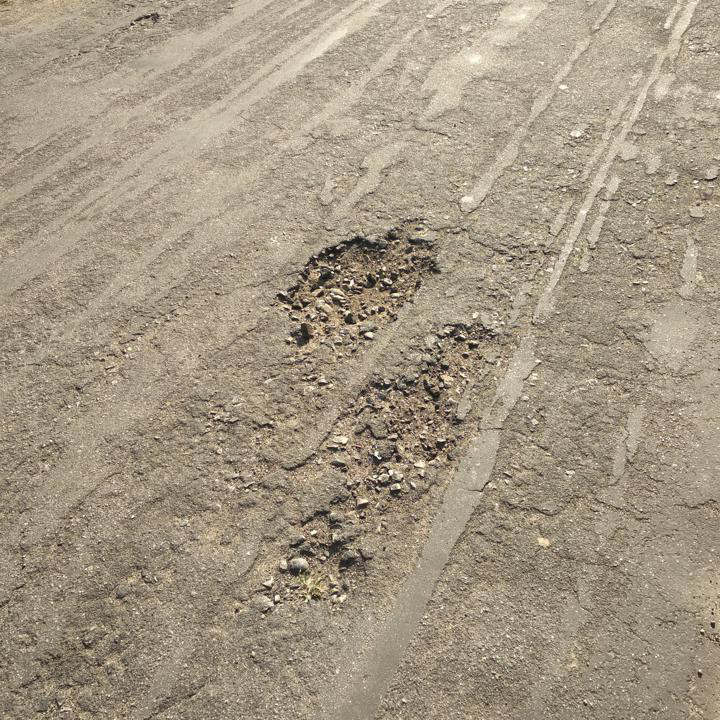

Saved 1 image to runs\detect\exp13


tensor([], size=(0, 6))

In [2]:
import torch
from PIL import Image
from pathlib import Path

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Noh/Python_Code/Deep/ch13/yolov5/runs/train/exp7/weights/best.pt')  # 'best.pt' 파일의 경로를 지정해주세요.

# 이미지 로드
img_path = 'C:/Users/Noh/Python_Code/Deep/roboflow_dataset/img_ (10).jpg'  # 탐지를 수행할 이미지 파일의 경로를 지정해주세요.
img = Image.open(img_path)

# 추론 실행
results = model(img)

# 결과 출력
results.print()  # 탐지된 객체의 정보를 콘솔에 출력합니다.
results.show()  # 탐지된 객체가 표시된 이미지를 보여줍니다.

# 결과를 다른 형식으로 저장하려면 다음과 같이 할 수 있습니다.
results.save(Path('/detect'))  # 탐지 결과 이미지를 저장합니다.
results.xyxy[0]  # 탐지된 객체의 바운딩 박스 정보를 얻습니다.

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 368, 'y': 301, 'width': 127, 'height': 108, 'confidence': 0.5067074298858643, 'class': 'pothole-eZet', 'class_id': 0, 'detection_id': 'b4468b60-a233-4678-9b2f-96ecd6e1224e', 'image_path': 'C:/Users/Noh/Python_Code/Deep/ch13/roboflow_dataset/img_ (5).jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '720', 'height': '720'}}


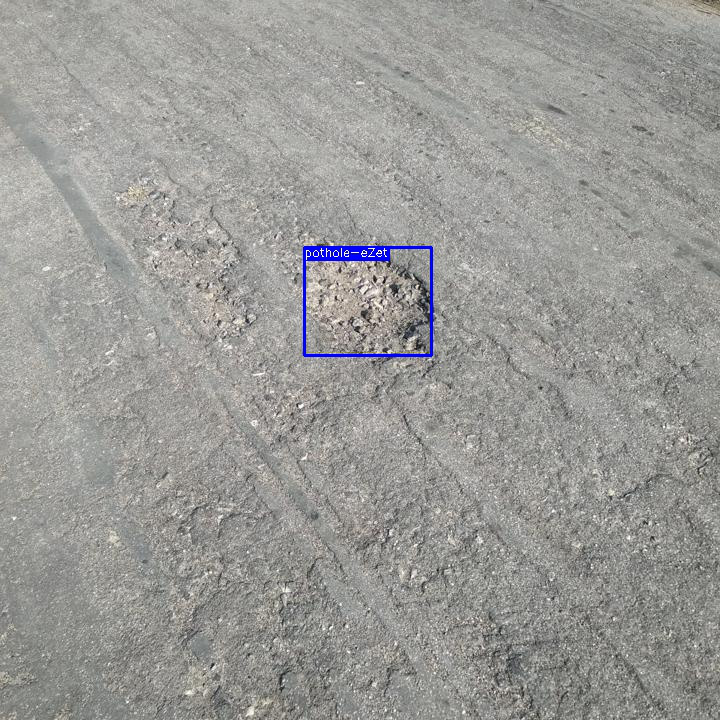

In [9]:
from PIL import Image

from roboflow import Roboflow
rf = Roboflow(api_key="W3QShbWn0jM4MZPu3F45")
project = rf.workspace("doheewan-rrxlw").project("pothole-doqr3")
model = project.version(1).model

# infer on a local image
print(model.predict("C:/Users/Noh/Python_Code/Deep/ch13/roboflow_dataset/img_ (5).jpg", confidence=40, overlap=30).json())

# visualize your prediction
model.predict("C:/Users/Noh/Python_Code/Deep/ch13/roboflow_dataset/img_ (5).jpg", confidence=40, overlap=30).save("prediction1.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

Image.open("C:/Users/Noh/Python_Code/Deep/ch13/prediction1.jpg")